**ВЫЯВЛЕНИЕ РАННЕЙ БОЛЕЗНИ АЛЬЦГЕЙМЕРА С ИСПОЛЬЗОВАНИЕМ ТЕСТОВЫХ И МРТ ДАННЫХ** 

Данные получены  из Kaggle которые были созданы в рамках проекта Open Access Series of Imaging Studies (OASIS). 
Cостоит из данных МРТ 373 людей в возрасте от 60 до 96 лет. Все они являются правшами.

Цель:  разработать надежную модель, которая поможет врачам предсказать раннюю болезнь Альцгеймера



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('longitudinal.csv')
data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   Group       373 non-null    int64  
 2   MR Delay    373 non-null    int64  
 3   M/F         373 non-null    int64  
 4   Age         373 non-null    int64  
 5   EDUC        373 non-null    int64  
 6   SES         354 non-null    float64
 7   MMSE        371 non-null    float64
 8   CDR         373 non-null    float64
 9   eTIV        373 non-null    int64  
 10  nWBV        373 non-null    float64
 11  ASF         373 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 35.1+ KB


In [7]:
data['M/F'] = data['M/F'].replace(['F','M'], [0,1])
data['Group'] = data['Group'].replace(['Converted'], ['Demented']) 
data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1,0]) 
data = data.drop(['MRI ID', 'Visit', 'Hand'], axis=1) 

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   Group       373 non-null    int64  
 2   MR Delay    373 non-null    int64  
 3   M/F         373 non-null    int64  
 4   Age         373 non-null    int64  
 5   EDUC        373 non-null    int64  
 6   SES         354 non-null    float64
 7   MMSE        371 non-null    float64
 8   CDR         373 non-null    float64
 9   eTIV        373 non-null    int64  
 10  nWBV        373 non-null    float64
 11  ASF         373 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 35.1+ KB


In [9]:
data=data.drop(['Subject ID','MMSE','SES'], axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     373 non-null    int64  
 1   MR Delay  373 non-null    int64  
 2   M/F       373 non-null    int64  
 3   Age       373 non-null    int64  
 4   EDUC      373 non-null    int64  
 5   CDR       373 non-null    float64
 6   eTIV      373 non-null    int64  
 7   nWBV      373 non-null    float64
 8   ASF       373 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 26.4 KB


In [11]:
data.isnull().sum()

Group       0
MR Delay    0
M/F         0
Age         0
EDUC        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [12]:
data.corr()

,Group,MR Delay,M/F,Age,EDUC,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.120638,0.222146,-0.005941,-0.193060,0.778049,-0.042700,-0.311346,0.032495
MR Delay,-0.120638,1.000000,0.048006,0.205357,0.051630,-0.062915,0.119624,-0.105586,-0.123545
M/F,0.222146,0.048006,1.000000,-0.037726,0.089279,0.202140,0.572549,-0.249618,-0.561647
Age,-0.005941,0.205357,-0.037726,1.000000,-0.027886,-0.026257,0.042348,-0.518359,-0.035067
EDUC,-0.193060,0.051630,0.089279,-0.027886,1.000000,-0.153121,0.257015,-0.012200,-0.241752
CDR,0.778049,-0.062915,0.202140,-0.026257,-0.153121,1.000000,0.022819,-0.344819,-0.029340
eTIV,-0.042700,0.119624,0.572549,0.042348,0.257015,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.311346,-0.105586,-0.249618,-0.518359,-0.012200,-0.344819,-0.210122,1.000000,0.213476
ASF,0.032495,-0.123545,-0.561647,-0.035067,-0.241752,-0.029340,-0.988877,0.213476,1.000000


In [13]:
def bar_chart(feature):
    Demented = data[data['Group']==1][feature].value_counts()
    Nondemented = data[data['Group']==0][feature].value_counts()
    data_bar = pd.DataFrame([Demented,Nondemented])
    data_bar.index = ['Demented','Nondemented']
    data_bar.plot(kind='bar',stacked=True, figsize=(6,5))

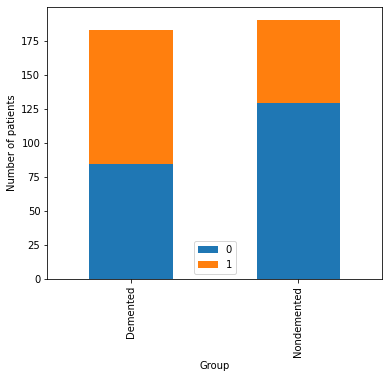

In [11]:
# Пол и Группа (женщина=0, мужчина=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()


Приведенный выше график показывает, что мужчины чаще страдают деменцией, чем женщины.

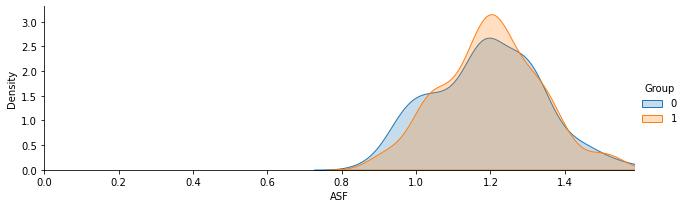

In [12]:
# 'ASF' Atlas Scaling Factor (ASF представляет собой расширение (или сокращение) объема всего мозга)
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, data['ASF'].max()))
facet.add_legend()


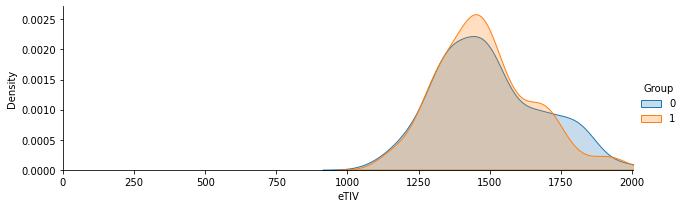

In [13]:
# 'eTIV' Estimated Total Intracranial Volume (Расчетный общий внутричерепной объем)
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, data['eTIV'].max()))
facet.add_legend()


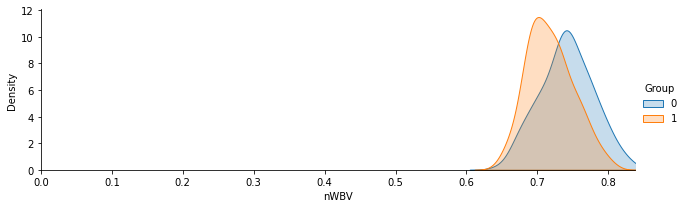

In [14]:
#'nWBV' = Normalized Whole Brain Volume (Нормализация объемов головного мозга с использованием внутричерепного объема)
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, data['nWBV'].max()))
facet.add_legend()

Эти диаграммы показывают, что группа без деменции имеет более высокий коэффициент объема мозга, чем группа с деменцией. Предполагается, что это связано с тем, что болезни влияют на мозг, уменьшая его ткань.

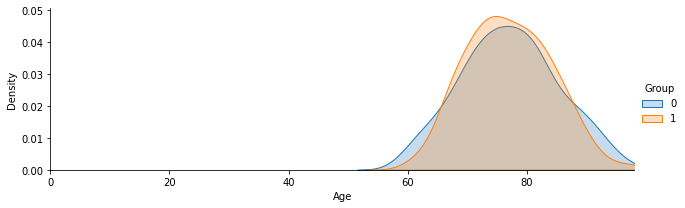

In [15]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()

В группе пациентов с более высокой деменцией наблюдается в возрасте 70-80 лет. Мы предполагаем, что пациенты, страдавшие этим заболеванием, имеют более низкую выживаемость, но встречаются единичные случаи выживаемости до 90 лет.

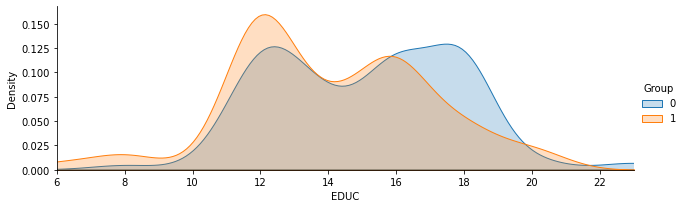

In [16]:
#'EDUC'  Годы обучения
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(data,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(data['EDUC'].min(), data['EDUC'].max()))
facet.add_legend()


Опираясь на промежуточные результаты исследования можно сделать следующие выводы:
1. Мужчины чаще страдают деменцией, чем женщины.
2. Пациенты с деменцией были меньше образованны с точки зрения количества лет обучения.
3. Группа без деменции имеет большой объем мозга, чем группа с деменцией.
4. Группе пациентов с более высокой деменцией наблюдается в возрасте 70-80 лет.

In [14]:
y = data['Group']
X = data[['Age', 'EDUC', 'eTIV', 'nWBV', 'ASF','CDR']]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#from sklearn.preprocessing import MinMaxScaler 
#from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [16]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
X_train

,Age,EDUC,eTIV,nWBV,ASF,CDR
136,78,8,1462,0.691,1.200,1.0
113,84,16,1500,0.744,1.170,0.0
158,75,14,1507,0.782,1.164,0.0
350,70,14,1510,0.770,1.162,0.0
114,85,18,1264,0.701,1.388,0.0
...,...,...,...,...,...,...
323,78,12,1569,0.704,1.119,1.0
192,75,12,1511,0.739,1.162,0.0
117,67,13,1365,0.827,1.285,0.0
47,69,12,1365,0.783,1.286,0.0


In [21]:
X_test

,Age,EDUC,eTIV,nWBV,ASF,CDR
45,82,12,1420,0.713,1.236,0.5
272,67,12,1331,0.761,1.318,0.0
54,80,12,1390,0.735,1.263,0.0
236,75,13,1520,0.708,1.155,0.5
253,74,11,1517,0.705,1.157,0.0
...,...,...,...,...,...,...
164,69,18,1536,0.719,1.143,0.0
301,77,13,1351,0.769,1.299,0.0
186,80,12,1494,0.661,1.175,1.0
17,66,12,1447,0.769,1.213,0.5


In [40]:
X.head()

,Age,EDUC,eTIV,nWBV,ASF,CDR
0,87,14,1987,0.696,0.883,0.0
1,88,14,2004,0.681,0.876,0.0
2,75,12,1678,0.736,1.046,0.5
3,76,12,1738,0.713,1.010,0.5
4,80,12,1698,0.701,1.034,0.5


In [18]:
acc = []

In [19]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(max_features='auto')

In [22]:
## Prediction
y_pred=classifier.predict(X_test)

In [23]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [35]:
score

0.9375

In [29]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [25]:
import numpy as np

In [28]:
classifier.predict([[2,3,4,1,5,6]])

C:\Users\Loiq\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)